# **DATA PREPARATION**

This notebook is used to perform data preparation from the dataset below : 

https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data?select=sales_train.csv



## **1. Acquiring Data**

The dataset will be downloaded using direct download via the Kaggle API key

In [1]:
! chmod 600 kaggle.json

In [2]:
! KAGGLE_CONFIG_DIR=/content/ kaggle competitions download -c competitive-data-science-predict-future-sales

items.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sales_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
shops.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
item_categories.csv: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
! mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [4]:
import zipfile

In [5]:
with zipfile.ZipFile('/content/sales_train.csv.zip','r') as f:
  f.extractall('/content/dataset/')

## **2. Loading Dataset Into DataFrame**

In [6]:
import pandas as pd

In [7]:
product_sales_df = pd.read_csv('/content/dataset/sales_train.csv')

In [8]:
product_sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [9]:
product_sales_df[product_sales_df['item_id'] == 7460].shape

(118, 6)

In [10]:
coba_df = product_sales_df[product_sales_df['item_id'] == 7460]

In [11]:
coba_df['shop_id'].unique()

array([59, 44, 38, 21, 22,  2, 11, 14,  7, 28, 25, 27, 47, 37, 57, 56, 52,
       54, 19, 15,  3,  4, 10, 31, 50,  6, 53, 48, 24, 58, 18, 41, 26, 46,
       35, 42])

In [12]:
coba_df.shape[0]

118

In [13]:
coba_df[coba_df['shop_id'] == 59].shape

(4, 6)

In [14]:
max_shop_id = 0
max_row = 0
unique_val = coba_df['shop_id'].unique()
for i in unique_val:
  row = coba_df[coba_df['shop_id'] == i].shape[0]
  if row > max_row:
    max_shop_id = i
    max_row = row
print("ID : {} --- Total Row : {}".format(max_shop_id, max_row))

ID : 25 --- Total Row : 20


## **3. Checking Missing Values**

In [15]:
product_sales_df.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

## **4. Value Selection at the 'shop_id' Feature**

In [16]:
# The code below is in comment mode because it is only needed in 
# a situation to find the value in the 'item_id' feature which has the most instances/rows

# def count_features_row(data_frame):
#     max_value = 0
#     pid_selected = 0
#     count_row = len(data_frame['item_id'])
#     done_pid = []
#     for i in range(0, count_row):
#         if data_frame.loc[i, 'item_id'] not in done_pid:
#           data = data_frame.loc[i,'item_id']
#           if data != 20949:
#             done_pid.append(data_frame.loc[i, 'item_id'])
#             pid = data_frame.loc[i, 'item_id']
#             curr_row_sum = len(data_frame[data_frame['item_id'] == pid])
#             if curr_row_sum > max_value:
#                 max_value = curr_row_sum
#                 pid_selected = pid
#     return "Features dengan row terbanyak :\n1. 'item_id':{}\n 2.Total Row : {}".format(pid_selected, max_value)


# print(count_features_row(product_sales_df))

In [17]:
product_sales_df[product_sales_df['item_id'] == 20949].shape

(31340, 6)

## **5. Separating Selected Value in the 'item_id' Feature into Another DataFrame**

In [18]:
fixed_df = product_sales_df[product_sales_df['item_id'] == 20949]

In [19]:
fixed_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
352379,30.04.2013,3,22,20949,5.000000,12.0
352399,29.04.2013,3,22,20949,4.923077,13.0
352400,28.04.2013,3,22,20949,5.000000,4.0
352401,27.04.2013,3,22,20949,5.000000,4.0
352455,24.04.2013,3,22,20949,5.000000,2.0
...,...,...,...,...,...,...
2930644,02.10.2015,33,22,20949,5.000000,1.0
2930645,03.10.2015,33,22,20949,5.000000,2.0
2930646,04.10.2015,33,22,20949,5.000000,3.0
2930647,05.10.2015,33,22,20949,5.000000,2.0


## **6. Checking Particular Value in the 'shop_id' Feature**

In [20]:
fixed_df[fixed_df['shop_id'] == 22].shape

(848, 6)

## **7. Separating Selected Value in the 'shop_id' Feature Into Another DataFrame**

In [21]:
shop_22_df = fixed_df[fixed_df['shop_id'] == 22]

In [22]:
shop_22_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
352379,30.04.2013,3,22,20949,5.000000,12.0
352399,29.04.2013,3,22,20949,4.923077,13.0
352400,28.04.2013,3,22,20949,5.000000,4.0
352401,27.04.2013,3,22,20949,5.000000,4.0
352455,24.04.2013,3,22,20949,5.000000,2.0
...,...,...,...,...,...,...
2930644,02.10.2015,33,22,20949,5.000000,1.0
2930645,03.10.2015,33,22,20949,5.000000,2.0
2930646,04.10.2015,33,22,20949,5.000000,3.0
2930647,05.10.2015,33,22,20949,5.000000,2.0


## **8. Converting 'date' Feature Into DateTime Pandas Format, and make it as an Index**

In [23]:
datetime = pd.to_datetime(shop_22_df['date'])

In [24]:
datetime

352379    2013-04-30
352399    2013-04-29
352400    2013-04-28
352401    2013-04-27
352455    2013-04-24
             ...    
2930644   2015-02-10
2930645   2015-03-10
2930646   2015-04-10
2930647   2015-05-10
2930648   2015-06-10
Name: date, Length: 848, dtype: datetime64[ns]

In [25]:
shop_22_df.drop(columns=['date'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
shop_22_df['date'] = datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
shop_22_df

,date_block_num,shop_id,item_id,item_price,item_cnt_day,date
352379,3,22,20949,5.000000,12.0,2013-04-30
352399,3,22,20949,4.923077,13.0,2013-04-29
352400,3,22,20949,5.000000,4.0,2013-04-28
352401,3,22,20949,5.000000,4.0,2013-04-27
352455,3,22,20949,5.000000,2.0,2013-04-24
...,...,...,...,...,...,...
2930644,33,22,20949,5.000000,1.0,2015-02-10
2930645,33,22,20949,5.000000,2.0,2015-03-10
2930646,33,22,20949,5.000000,3.0,2015-04-10
2930647,33,22,20949,5.000000,2.0,2015-05-10


In [28]:
shop_22_df.set_index('date', inplace=True)

In [29]:
shop_22_df

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-04-30,3,22,20949,5.000000,12.0
2013-04-29,3,22,20949,4.923077,13.0
2013-04-28,3,22,20949,5.000000,4.0
2013-04-27,3,22,20949,5.000000,4.0
2013-04-24,3,22,20949,5.000000,2.0
...,...,...,...,...,...
2015-02-10,33,22,20949,5.000000,1.0
2015-03-10,33,22,20949,5.000000,2.0
2015-04-10,33,22,20949,5.000000,3.0


## **9. Sorting DataFrame Index**

In [30]:
shop_22_df = shop_22_df.sort_values(by='date')

In [31]:
shop_22_df

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-05,4,22,20949,5.0,4.0
2013-01-06,5,22,20949,5.0,5.0
2013-01-07,6,22,20949,5.0,5.0
2013-01-08,7,22,20949,5.0,9.0
2013-01-09,8,22,20949,5.0,5.0
...,...,...,...,...,...
2015-12-04,27,22,20949,5.0,1.0
2015-12-05,28,22,20949,4.8,5.0
2015-12-06,29,22,20949,5.0,2.0


## **10. Checking Data Type on each Feature**

In [32]:
shop_22_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 848 entries, 2013-01-05 to 2015-12-09
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_block_num  848 non-null    int64  
 1   shop_id         848 non-null    int64  
 2   item_id         848 non-null    int64  
 3   item_price      848 non-null    float64
 4   item_cnt_day    848 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 39.8 KB


## **11. Removing Unnecessary Feature**

In [33]:
shop_22_df.drop('date_block_num',axis=1,inplace=True)

In [34]:
shop_22_df

,shop_id,item_id,item_price,item_cnt_day
date,,,,
2013-01-05,22,20949,5.0,4.0
2013-01-06,22,20949,5.0,5.0
2013-01-07,22,20949,5.0,5.0
2013-01-08,22,20949,5.0,9.0
2013-01-09,22,20949,5.0,5.0
...,...,...,...,...
2015-12-04,22,20949,5.0,1.0
2015-12-05,22,20949,4.8,5.0
2015-12-06,22,20949,5.0,2.0


## **12. Changing Column Names**

In [35]:
shop_22_df.columns = ['shop_id','item_id','item_price','item_sold_per_day']

In [36]:
shop_22_df

,shop_id,item_id,item_price,item_sold_per_day
date,,,,
2013-01-05,22,20949,5.0,4.0
2013-01-06,22,20949,5.0,5.0
2013-01-07,22,20949,5.0,5.0
2013-01-08,22,20949,5.0,9.0
2013-01-09,22,20949,5.0,5.0
...,...,...,...,...
2015-12-04,22,20949,5.0,1.0
2015-12-05,22,20949,4.8,5.0
2015-12-06,22,20949,5.0,2.0


## **13. Visualizing the Important Feature**

In [37]:
import matplotlib.pyplot as plt

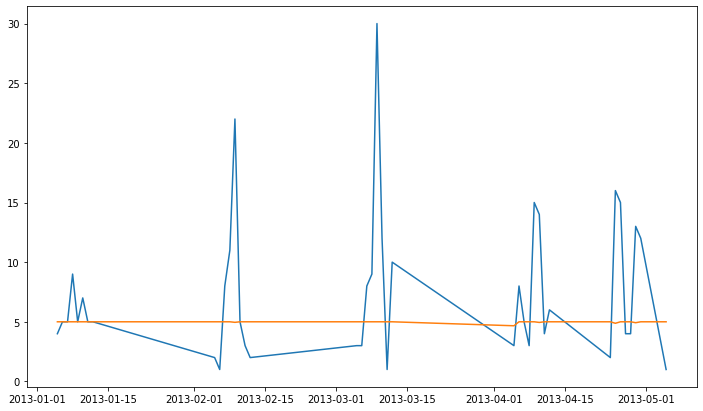

In [38]:
plt.figure(figsize=(12,7))
tester_init = shop_22_df.iloc[:40]
tester = tester_init['item_sold_per_day']
tester_price = tester_init['item_price']
plt.plot(
    tester.index,
    tester)
plt.plot(
    tester.index,
    tester_price
)
plt.show()

## **14. Selecting Particular Instances & Feature**

In [39]:
shop_22_df = shop_22_df[:40]
shop_22_df = shop_22_df[['item_price','item_sold_per_day']]

## **15. Descriptive Statistics**

In [40]:
shop_22_df.describe()

,item_price,item_sold_per_day
count,40.000000,40.000000
mean,4.984143,7.500000
std,0.057184,6.101702
min,4.666667,1.000000
25%,5.000000,3.000000
50%,5.000000,5.000000
75%,5.000000,10.250000
max,5.000000,30.000000


## **16. Separating Data into Training Set & Validation Set**

In [41]:
train_set = shop_22_df[:30]

In [42]:
val_set = shop_22_df[:10]

## **17. Normalizing the Data**

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
train_set = scaler.fit_transform(train_set)

In [46]:
val_set = scaler.fit_transform(val_set)

In [51]:
import numpy as np

In [52]:
train_set = pd.DataFrame(train_set,columns=['item_price','item_sold_per_day'],dtype=np.float32)

In [53]:
val_set = pd.DataFrame(val_set,columns=['item_price','item_sold_per_day'],dtype=np.float32)

## **18. Creating Windowed/Lag**

In [54]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [55]:
atribut_train = train_set.values

In [56]:
atribut_train

array([[1.        , 0.10344828],
       [1.        , 0.13793103],
       [1.        , 0.13793103],
       [1.        , 0.27586207],
       [1.        , 0.13793103],
       [1.        , 0.20689656],
       [1.        , 0.13793103],
       [1.        , 0.13793103],
       [1.        , 0.03448276],
       [1.        , 0.        ],
       [1.        , 0.2413793 ],
       [1.        , 0.3448276 ],
       [0.8636364 , 0.7241379 ],
       [1.        , 0.13793103],
       [1.        , 0.06896552],
       [1.        , 0.03448276],
       [1.        , 0.06896552],
       [1.        , 0.06896552],
       [1.        , 0.2413793 ],
       [1.        , 0.27586207],
       [1.        , 1.        ],
       [1.        , 0.37931034],
       [1.        , 0.        ],
       [1.        , 0.31034482],
       [0.        , 0.06896552],
       [1.        , 0.2413793 ],
       [1.        , 0.13793103],
       [1.        , 0.06896552],
       [1.        , 0.4827586 ],
       [0.83928573, 0.44827586]], dtype=flo

In [57]:
atribut_val = val_set.values

In [58]:
train_set.shape

(30, 2)

In [59]:
train_set = train_set[['item_sold_per_day']]
val_set = val_set[['item_sold_per_day']]
train_set.shape

(30, 1)

In [60]:
target_train = pd.concat([train_set['item_sold_per_day'], train_set['item_sold_per_day'].shift(-1), train_set['item_sold_per_day'].shift(-2), train_set['item_sold_per_day'].shift(-3), train_set['item_sold_per_day'].shift(-4)], axis=1).dropna().values
target_val = pd.concat([val_set['item_sold_per_day'],val_set['item_sold_per_day'].shift(-1),val_set['item_sold_per_day'].shift(-2),val_set['item_sold_per_day'].shift(-3),val_set['item_sold_per_day'].shift(-4)], axis=1).dropna().values

In [61]:
target_train.shape

(26, 5)

In [62]:
window_train = TimeseriesGenerator(atribut_train[:-4], target_train, length=5, batch_size=2)
window_val = TimeseriesGenerator(atribut_val[:-4], target_val, length=5, batch_size=1)